In [1]:
import lstm

SEQ_LEN=15

Using TensorFlow backend.


In [55]:
# get Microsoft's stock opening prices and create list of 15 day frames
times = lstm.get_time_series_daily("MSFT", filters=["4. close"])
# times = lstm.get_time_series_daily("MSFT", filters=["4. close", "5. volume"], outputsize="full")
# times are returned descending from most recent so should be reversed
vectors = lstm.times_to_vectors(times)[::-1]
frames = lstm.get_frames(vectors, seq_len=SEQ_LEN, with_target=True) # each frame is 15+1 (trend length + prediction target) vectors

print(f"last frame: {frames[-1]}")
print(f"last target frame: {frames[-1][-1]}")

normalized_frames = lstm.normalize_frames(frames)

last frame: [['105.2700'], ['105.6700'], ['105.2500'], ['106.8900'], ['106.8100'], ['106.9000'], ['108.2200'], ['108.1700'], ['107.1500'], ['109.4100'], ['110.9700'], ['111.5900'], ['112.3600'], ['112.1700'], ['112.0300'], ['112.5300']]
last target frame: ['112.5300']


In [46]:
# seperate normalized frames into training and testing data
train, test = lstm.partition_data(normalized_frames, partition_coefficient=0.8)
# split training and testing data into sequences and their targets
train_x, train_y = lstm.seperate_xy(train)
# train_y = [[target[0]] for target in train_y]

test_x, test_y = lstm.seperate_xy(test)
# test_y = [[target[0]] for target in test_y]

print(f"training sequence 1: {train_x[0]}, target: {train_y[0]}")
print(f"testing sequence 1: {test_x[0]}, target: {test_y[0]}")

training sequence 1: [[0.0], [0.03815113719735863], [0.04292002934702843], [0.04108584005869398], [0.05796038151137184], [0.04071900220102709], [0.010638297872340496], [0.02127659574468077], [0.039618488628026416], [0.0403521643433602], [0.060161408657373405], [0.04548789435069689], [0.08217168011738796], [0.09904622157006604], [0.06639765223771099]], target: [0.08584005869405731]
testing sequence 1: [[0.0], [-0.01455721795390208], [-0.025070764253942612], [-0.015365952284674411], [-0.029923170238576713], [-0.037808329963606946], [-0.04023453295592405], [-0.03457339264051762], [-0.03336029114435901], [-0.016983420946219185], [-0.020218358269308512], [-0.027901334411645773], [-0.01253538212697125], [-0.021027092600080843], [-0.035685402345329575]], target: [-0.037808329963606946]


In [47]:
# create LSTM model using the training data
model = lstm.setup_lstm_model(train_x, train_y)
print(model)

compilation time :  0.019860029220581055
Train on 4033 samples, validate on 213 samples
Epoch 1/1
4033/4033 [==============================] - 2s 609us/step - loss: 0.0062 - val_loss: 0.0035


In [48]:
# predict results using the test data
predictions = lstm.predict_sequences_multiple(model, test_x)

final sequence: [[0.0, 0.0], [-0.007558111898084308, -0.2788780114928088], [0.009649664876170583, -0.3644596764652387], [0.009079241336692467, -0.1580642415733744], [0.022008841564861825, -0.381907318904527], [0.01069544136521361, -0.26800427422785156], [0.025906735751295207, -0.10597235004274264], [0.024765888672339198, -0.3938831472932237], [0.025431382801730296, -0.27395279082341384], [0.016304606170081337, -0.02343580864386341], [0.04625184199267962, -0.06711801810286899], [0.06250891286780447, -0.20194748799062068], [0.0577553833721538, -0.27633640435235773], [0.06184341873841315, -0.27800541768225384], [0.06517088938536864, -0.022740159613869215]]
predicted: [0.05552061]
actual: [0.07325188952797457, -0.2103286761059393]


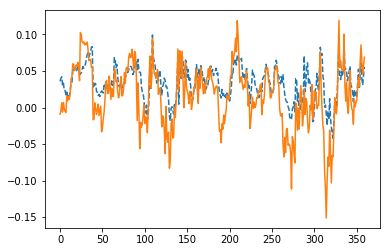

Next predicted normalized value:
current: [0.06896551724137945], next predicted: [0.06014197]


In [50]:
print(f"final sequence: {x_test[-1]}")
print(f"predicted: {predictions[-1]}")
print(f"actual: {y_test[-1]}")
# plot the results of the last month
# (dashed line is prediction)
lstm.plot_results_multiple(predictions[-360:], test_y[-360:])

# get next prediction:
next_seq = normalized_frames[-1][-SEQ_LEN:]
current_val = next_seq[-1]
next_predicted = lstm.predict_sequences_multiple(model, [next_seq])
print("Next predicted normalized value:")
print(f"current: {current_val}, next predicted: {next_predicted[0]}")